In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit = pd.read_csv('credit.csv')
credit.drop(columns = ['Rating', 'Balance'], inplace = True)
credit['Income'] = credit['Income']*1000
credit['Income'] = credit['Income'].astype(int)
credit = credit[credit['Age'] <= 80]
credit = credit[credit.Cards < 6]

credit

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,14891,3606,2,34,11,Male,No,Yes,Caucasian
2,104593,7075,4,71,11,Male,No,No,Asian
3,148924,9504,3,36,11,Female,No,No,Asian
4,55882,4897,2,68,16,Male,No,Yes,Caucasian
5,80180,8047,4,77,10,Male,No,No,Caucasian
...,...,...,...,...,...,...,...,...,...
395,12096,4100,3,32,13,Male,No,Yes,Caucasian
396,13364,3838,5,65,17,Male,No,No,African American
397,57872,4171,5,67,12,Female,No,Yes,Caucasian
398,37728,2525,1,44,13,Male,No,Yes,Caucasian


In [5]:
credit.describe()

,Income,Limit,Cards,Age,Education
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,41766.071429,4561.505714,2.805714,52.994286,13.462857
std,32554.385769,2179.116616,1.166373,15.759473,3.131784
min,10354.000000,855.000000,1.000000,23.000000,5.000000
25%,20114.750000,2971.750000,2.000000,40.250000,11.000000
50%,30521.000000,4437.500000,3.000000,52.000000,14.000000
75%,53548.750000,5671.250000,4.000000,67.000000,16.000000
max,186634.000000,13414.000000,5.000000,80.000000,20.000000


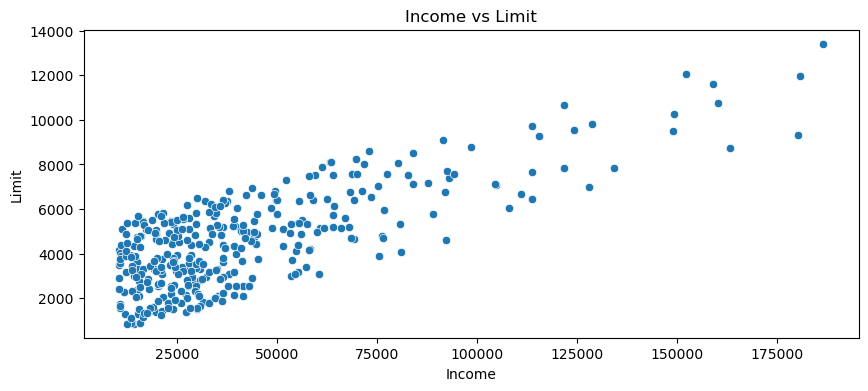

In [6]:
# Clear relation
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Income', y='Limit', data=credit)
plt.title('Income vs Limit')
plt.show()

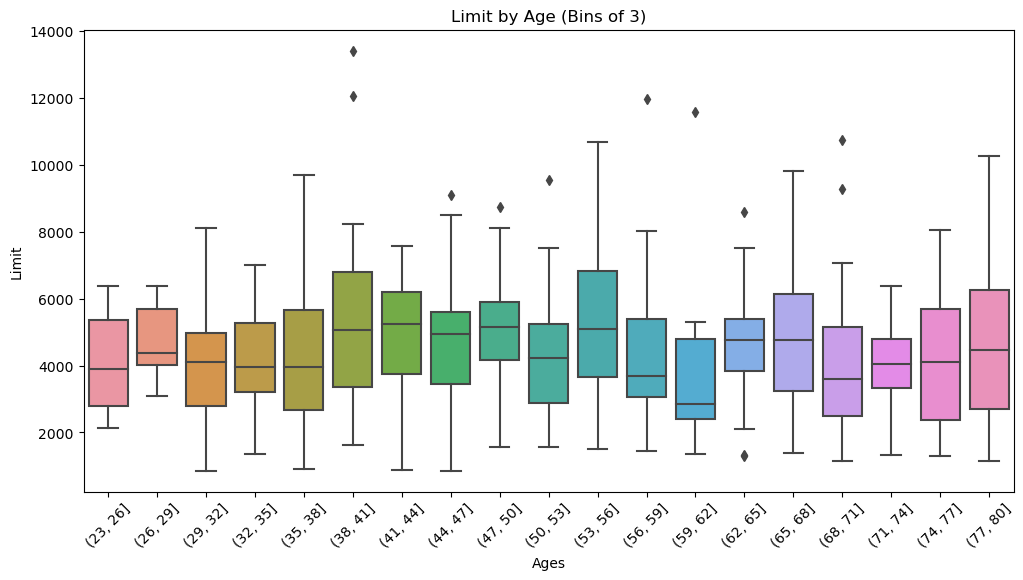

In [7]:
age_bins = np.arange(credit['Age'].min(), credit['Age'].max() + 3, 3)
credit['Age_Bin'] = pd.cut(credit['Age'], bins=age_bins)

# We could observe a pattern here
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Bin', y='Limit', data=credit)
plt.title('Limit by Age (Bins of 3)')
plt.xlabel('Ages')
plt.ylabel('Limit')
plt.xticks(rotation=45)
plt.show()

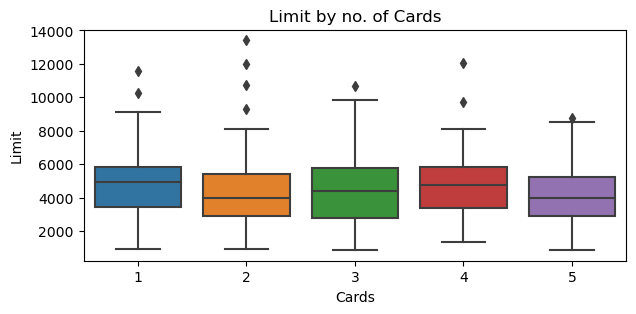

In [8]:
# Creating a box plot
plt.figure(figsize=(7, 3))
sns.boxplot(x='Cards', y='Limit', data=credit)
plt.title('Limit by no. of Cards')
plt.xlabel('Cards')
plt.ylabel('Limit')
plt.show()

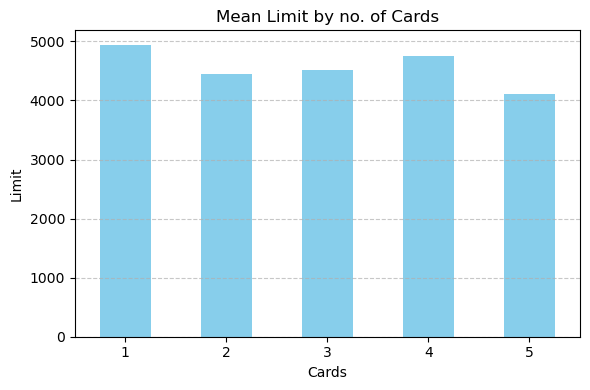

In [9]:
# Calculate mean of 'Limit' for each 'Cards' category
mean_limit_by_cards = credit.groupby('Cards')['Limit'].mean()

# Plotting bar chart
plt.figure(figsize=(6, 4))
mean_limit_by_cards.plot(kind='bar', color='skyblue')
plt.title('Mean Limit by no. of Cards')
plt.xlabel('Cards')
plt.ylabel('Limit')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

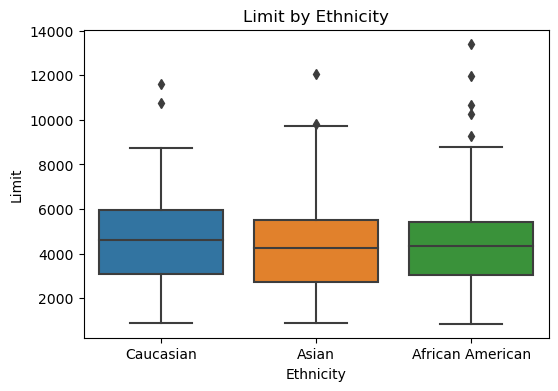

In [10]:
# No Real difference, also we cannot have just these 3 ethnicity. So dropping them out
plt.figure(figsize=(6, 4))
sns.boxplot(x='Ethnicity', y='Limit', data=credit)
plt.title('Limit by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Limit')
plt.show()

In [11]:
credit[credit.Student == 'Yes'].describe()

,Income,Limit,Cards,Age,Education
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,44531.555556,4566.888889,2.694444,52.833333,14.083333
std,36836.193477,2203.213831,1.141914,14.393451,2.931358
min,10627.000000,905.000000,1.000000,24.000000,8.000000
25%,20789.750000,2938.000000,2.000000,42.500000,12.000000
50%,32233.000000,4556.000000,3.000000,52.000000,15.000000
75%,54592.250000,5835.000000,3.000000,66.250000,16.000000
max,180379.000000,9560.000000,5.000000,78.000000,19.000000


In [12]:
credit[(credit['Student'] == 'Yes')]

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Ethnicity,Age_Bin
9,71061,6819,3,41,19,Female,Yes,Yes,African American,"(38, 41]"
35,23350,2558,3,49,12,Female,Yes,No,Caucasian,"(47, 50]"
41,113659,7659,2,66,15,Male,Yes,Yes,African American,"(65, 68]"
46,19531,5043,2,64,16,Female,Yes,Yes,Asian,"(62, 65]"
47,44646,4431,2,49,15,Male,Yes,Yes,Caucasian,"(47, 50]"
49,43479,4569,4,49,13,Male,Yes,Yes,African American,"(47, 50]"
76,30622,3293,1,68,16,Male,Yes,No,Caucasian,"(65, 68]"
96,14312,5382,1,59,17,Male,Yes,No,Asian,"(56, 59]"
98,36295,2963,2,68,14,Female,Yes,No,African American,"(65, 68]"
101,17976,2433,3,70,16,Female,Yes,No,Caucasian,"(68, 71]"


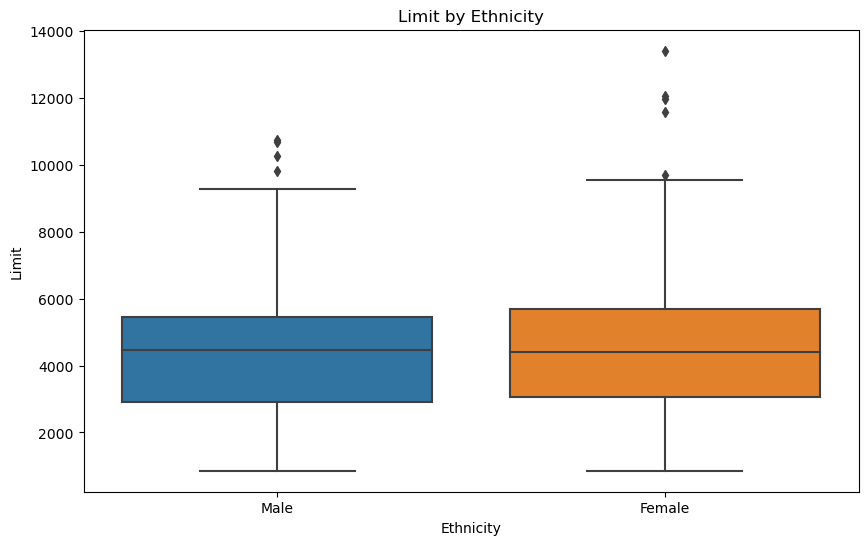

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Limit', data=credit)
plt.title('Limit by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Limit')
plt.show()

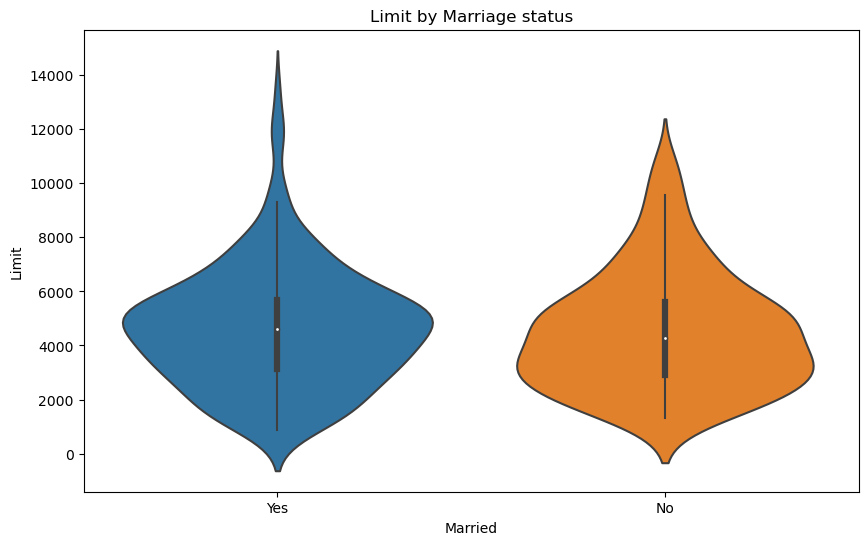

In [14]:
# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Married', y='Limit', data=credit)
plt.title('Limit by Marriage status')
plt.xlabel('Married')
plt.ylabel('Limit')
plt.show()

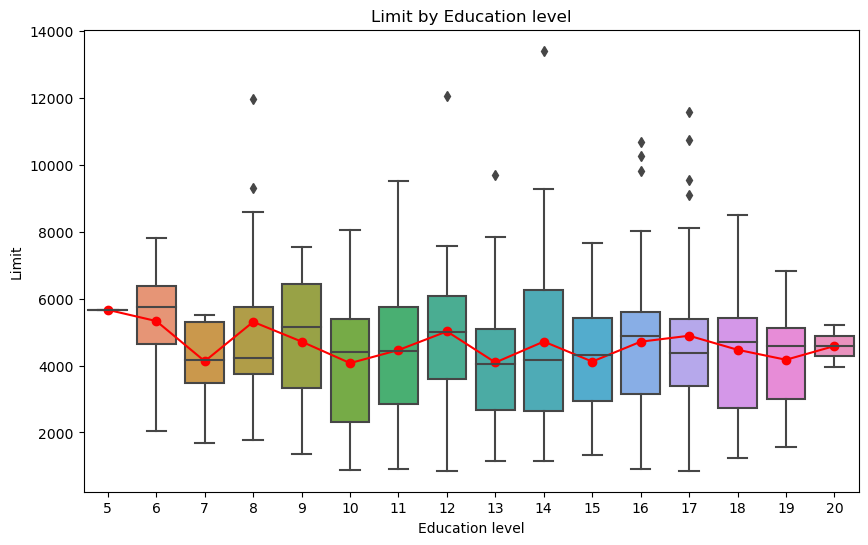

In [15]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Limit', data=credit)
plt.title('Limit by Education level')
plt.xlabel('Education level')
plt.ylabel('Limit')

mean_limit_by_education = credit.groupby('Education')['Limit'].mean().reset_index()
plt.plot(mean_limit_by_education.index, mean_limit_by_education['Limit'], color='red', marker='o', linestyle='-')

plt.show()

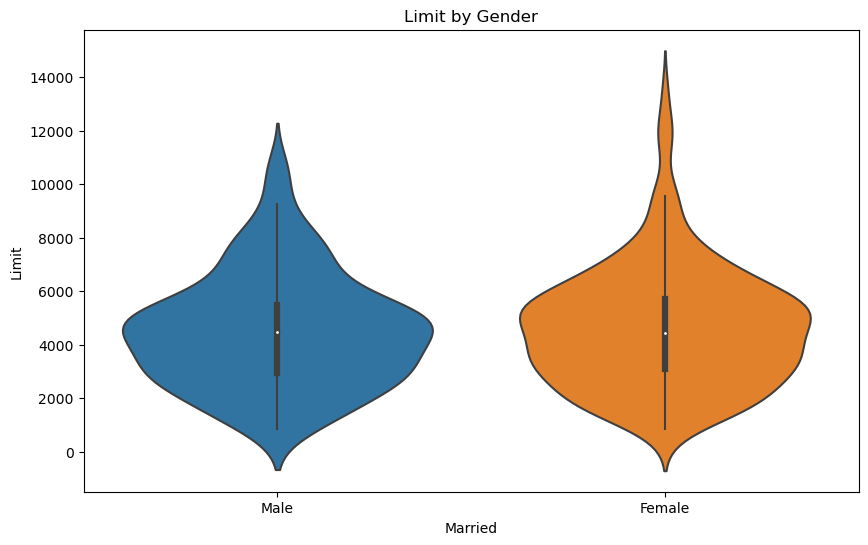

In [16]:
# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Limit', data=credit)
plt.title('Limit by Gender')
plt.xlabel('Married')
plt.ylabel('Limit')
plt.show()

In [17]:
credit.drop(columns = ['Student', 'Ethnicity', 'Age'], inplace = True)
credit.dropna(inplace = True)